# Лабораторная работа № 2


In [1]:
import pandas as pd
import numpy as np
import mlxtend.frequent_patterns as ml
import seaborn as sns

## 1. Выбор нескольких стран для набора данных lastfm для сравнительного анализа


### Загружаем данные


In [2]:
data = pd.read_csv("lastfm.csv")
data.sample(10)

,user,artist,sex,country
95178,6479,sufjan stevens,m,United States
289347,19681,röyksopp,m,Netherlands
28989,1941,beastie boys,f,Germany
109626,7460,aphex twin,m,United States
160706,10938,the white stripes,f,Chile
264324,17926,guns n roses,f,Canada
133407,9055,the clash,m,Switzerland
210417,14306,tenacious d,f,United Kingdom
23841,1573,iron maiden,m,Brazil
58771,3973,underoath,m,Russian Federation


### Для исследования были выбраны 4 страны: США, Германия, Великобритания и Польша.


In [3]:
selected_countries = ['United States', 'Germany', 'United Kingdom', 'Poland']
selected = data[data.country.isin(selected_countries)]
selected.sample(10)

,user,artist,sex,country
45765,3121,the who,m,United States
289164,19670,the cure,f,Poland
62240,4202,mogwai,m,United Kingdom
123055,8353,deerhunter,m,Poland
198345,13482,avril lavigne,f,Poland
177028,12038,switchfoot,f,United States
220847,15002,usher,m,United Kingdom
235567,16016,darkthrone,m,Germany
4492,313,the blood brothers,m,Germany
61854,4180,scissor sisters,m,United Kingdom


In [4]:
selected.country.value_counts().sort_values(ascending = False) # подсчет количества элементов по странам

United States     59558
United Kingdom    27638
Germany           24251
Poland            17111
Name: country, dtype: int64

In [5]:
selected.artist.value_counts().sort_values(ascending = False).head(7) # подсчет количества элементов по артистам

the beatles              1276
radiohead                1175
coldplay                  955
red hot chili peppers     761
death cab for cutie       692
muse                      635
pink floyd                611
Name: artist, dtype: int64

## 2. Подготовка набора для поиска ассоциативных правил


### Группировка данных


In [6]:
groupped = selected.groupby('user')['artist'].apply(';'.join)
groupped

user
1        red hot chili peppers;the black dahlia murder;...
3        devendra banhart;boards of canada;cocorosie;ap...
4        tv on the radio;tool;kyuss;dj shadow;air;a tri...
9        arch enemy;strapping young lad;kreator;childre...
18       sonata arctica;infected mushroom;iron maiden;c...
                               ...                        
19705    muse;neutral milk hotel;animal collective;mode...
19709    oasis;foo fighters;kings of leon;taylor swift;...
19712    john williams;abba;vangelis;hans zimmer;céline...
19714    misfits;type o negative;arch enemy;red hot chi...
19715    abba;james blunt;jason mraz;amy winehouse;quee...
Name: artist, Length: 6401, dtype: object

### Бинаризация данных


In [7]:
binary_data = groupped.str.get_dummies(";")
binary_data.iloc[0:10, 100:110]

,beastie boys,beatsteaks,beck,bee gees,behemoth,beirut,belle and sebastian,ben folds,ben folds five,ben harper
user,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0
20,0,0,1,0,0,1,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0


## 3. Поиск характерных комбинации музыкальных коллективов


### Для всех выбранных стран


In [8]:
freq_items = ml.apriori(binary_data, min_support = 0.03, use_colnames = True)
print("Найдено %d характерных комбинаций" % len(freq_items))
freq_items.sort_values('support', ascending=True)

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Найдено 197 характерных комбинаций


,support,itemsets
195,0.030152,"(the beatles, the shins)"
54,0.030308,(frank sinatra)
99,0.030464,(nick drake)
151,0.030464,(the magnetic fields)
0,0.030620,(30 seconds to mars)
...,...,...
42,0.108108,(death cab for cutie)
120,0.118888,(red hot chili peppers)
36,0.149195,(coldplay)
116,0.183565,(radiohead)


### Разделение для разных стран


#### США


In [9]:
selected_usa = data[data.country.isin(['United States'])]
groupped_usa = selected_usa.groupby('user')['artist'].apply(';'.join)
binary_usa = groupped_usa.str.get_dummies(";")

freq_items_usa = ml.apriori(binary_usa, min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций" % len(freq_items_usa))
freq_items_usa.sort_values('support', ascending=True)

Найдено 106 характерных комбинаций


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
76,0.050602,(the magnetic fields)
11,0.050602,(boards of canada)
66,0.050602,(taking back sunday)
42,0.050947,(m.i.a.)
54,0.050947,(r.e.m.)
...,...,...
44,0.142513,(modest mouse)
19,0.153873,(coldplay)
22,0.176592,(death cab for cutie)
55,0.230981,(radiohead)


#### Великобритания


In [10]:
selected_uk = data[data.country.isin(['United Kingdom'])]
groupped_uk = selected_uk.groupby('user')['artist'].apply(';'.join)
binary_uk = groupped_uk.str.get_dummies(";")

freq_items_uk = ml.apriori(binary_uk, min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций" % len(freq_items_uk))
freq_items_uk.sort_values('support', ascending=True)

Найдено 115 характерных комбинаций


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
81,0.050159,(sonic youth)
112,0.050159,"(the beatles, muse)"
42,0.050159,(kasabian)
78,0.050159,(röyksopp)
77,0.050159,(regina spektor)
...,...,...
44,0.149682,(kings of leon)
19,0.153662,(david bowie)
59,0.166401,(muse)
84,0.214968,(the beatles)


#### Германия


In [11]:
selected_ger = data[data.country.isin(['Germany'])]
groupped_ger = selected_ger.groupby('user')['artist'].apply(';'.join)
binary_ger = groupped_ger.str.get_dummies(";")

freq_items_ger = ml.apriori(binary_ger, min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций" % len(freq_items_ger))
freq_items_ger.sort_values('support', ascending=True)

Найдено 82 характерных комбинаций


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.050119,(30 seconds to mars)
7,0.050119,(avril lavigne)
34,0.050915,(iron maiden)
77,0.050915,"(linkin park, die Ärzte)"
56,0.052506,(queens of the stone age)
...,...,...
59,0.146380,(rammstein)
60,0.147176,(red hot chili peppers)
16,0.156722,(coldplay)
41,0.157518,(linkin park)


#### Польша


In [12]:
selected_pol = data[data.country.isin(['Poland'])]
groupped_pol = selected_pol.groupby('user')['artist'].apply(';'.join)
binary_pol = groupped_pol.str.get_dummies(";")

freq_items_pol = ml.apriori(binary_pol, min_support = 0.05, use_colnames = True)
print("Найдено %d характерных комбинаций" % len(freq_items_pol))
freq_items_pol.sort_values('support', ascending=True)

Найдено 68 характерных комбинаций


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
25,0.050865,(justin timberlake)
64,0.050865,(timbaland)
61,0.050865,(the killers)
24,0.050865,(joy division)
44,0.050865,(pearl jam)
...,...,...
11,0.125127,(coldplay)
38,0.126144,(myslovitz)
57,0.131231,(system of a down)
53,0.142421,(red hot chili peppers)


## 4. Сравнение результатов поиска характерных комбинаций разных алгоритмов (apriori, fpgrowth, fpmax)


In [13]:
frequent_itemsets_apriori =  ml.apriori(binary_data, min_support=0.03, use_colnames=True)
print("Найдено %d характерных комбинаций" % len(frequent_itemsets_apriori))
frequent_itemsets_apriori.sort_values(by=['support', 'itemsets'], ascending=True)

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Найдено 197 характерных комбинаций


,support,itemsets
195,0.030152,"(the beatles, the shins)"
54,0.030308,(frank sinatra)
99,0.030464,(nick drake)
151,0.030464,(the magnetic fields)
0,0.030620,(30 seconds to mars)
...,...,...
42,0.108108,(death cab for cutie)
120,0.118888,(red hot chili peppers)
36,0.149195,(coldplay)
116,0.183565,(radiohead)


In [14]:
frequent_itemsets_fpgrowth = ml.fpgrowth(binary_data, min_support=0.03, use_colnames=True)
print("Найдено %d характерных комбинаций" % len(frequent_itemsets_fpgrowth))
frequent_itemsets_fpgrowth.sort_values(by=['support', 'itemsets'], ascending=True)

Найдено 197 характерных комбинаций


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
191,0.030152,"(the beatles, the shins)"
160,0.030308,(frank sinatra)
141,0.030464,(nick drake)
46,0.030464,(the magnetic fields)
102,0.030620,(30 seconds to mars)
...,...,...
65,0.108108,(death cab for cutie)
0,0.118888,(red hot chili peppers)
64,0.149195,(coldplay)
7,0.183565,(radiohead)


In [15]:
frequent_itemsets_fpmax = ml.fpmax(binary_data, min_support=0.03, use_colnames=True)
print("Найдено %d характерных комбинаций" % len(frequent_itemsets_fpmax))
frequent_itemsets_fpmax.sort_values(by=['support', 'itemsets'], ascending=True)

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Найдено 178 характерных комбинаций


,support,itemsets
151,0.030152,"(the beatles, the shins)"
0,0.030308,(frank sinatra)
1,0.030464,(the magnetic fields)
2,0.030464,(nick drake)
160,0.030620,"(the beatles, modest mouse)"
...,...,...
158,0.084518,(system of a down)
159,0.085143,(kanye west)
162,0.088267,(metallica)
163,0.088736,(nirvana)


При параметрах поддержки 0.1 и 0.05 все три алгоритма возвращали один и тот же результат. При параметре поддержки 0.03 алгоритм fpmax вернул меньше результатов чем fpgrowth и apriori, так как данный алгоритм находит только максимальные характерные комбинации. Они являются самыми общими комбинациями, которые не содержат вложенные комбинации.


## 5. Построение ассоциативных правил для Германии


### Apriori


#### С метрикой confidence


In [16]:
a_rules_conf = ml.association_rules(freq_items_ger, metric = "confidence", min_threshold = 0.2)
print(a_rules_conf.shape)
a_rules_conf.sort_values('confidence', ascending=False)

(12, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(die toten hosen),(die Ärzte),0.115354,0.194909,0.065235,0.565517,2.901450,0.042751,1.852988,0.740799
9,(system of a down),(die Ärzte),0.128878,0.194909,0.056484,0.438272,2.248602,0.031364,1.433240,0.637430
11,(system of a down),(rammstein),0.128878,0.146380,0.053302,0.413580,2.825382,0.034436,1.455646,0.741648
4,(rammstein),(die Ärzte),0.146380,0.194909,0.056484,0.385870,1.979747,0.027953,1.310945,0.579749
6,(red hot chili peppers),(die Ärzte),0.147176,0.194909,0.054893,0.372973,1.913580,0.026207,1.283982,0.559810
10,(rammstein),(system of a down),0.146380,0.128878,0.053302,0.364130,2.825382,0.034436,1.369969,0.756854
1,(die Ärzte),(die toten hosen),0.194909,0.115354,0.065235,0.334694,2.901450,0.042751,1.329683,0.814000
2,(linkin park),(die Ärzte),0.157518,0.194909,0.050915,0.323232,1.658380,0.020213,1.189613,0.471229
5,(die Ärzte),(rammstein),0.194909,0.146380,0.056484,0.289796,1.979747,0.027953,1.201936,0.614694
8,(die Ärzte),(system of a down),0.194909,0.128878,0.056484,0.289796,2.248602,0.031364,1.226579,0.689709


#### С метрикой support


In [17]:
a_rules_sup = ml.association_rules(freq_items_ger, metric = "support", min_threshold = 0.03)
print(a_rules_sup.shape)
a_rules_sup.sort_values('support', ascending=False)

(12, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(die toten hosen),(die Ärzte),0.115354,0.194909,0.065235,0.565517,2.901450,0.042751,1.852988,0.740799
1,(die Ärzte),(die toten hosen),0.194909,0.115354,0.065235,0.334694,2.901450,0.042751,1.329683,0.814000
4,(rammstein),(die Ärzte),0.146380,0.194909,0.056484,0.385870,1.979747,0.027953,1.310945,0.579749
5,(die Ärzte),(rammstein),0.194909,0.146380,0.056484,0.289796,1.979747,0.027953,1.201936,0.614694
8,(die Ärzte),(system of a down),0.194909,0.128878,0.056484,0.289796,2.248602,0.031364,1.226579,0.689709
9,(system of a down),(die Ärzte),0.128878,0.194909,0.056484,0.438272,2.248602,0.031364,1.433240,0.637430
6,(red hot chili peppers),(die Ärzte),0.147176,0.194909,0.054893,0.372973,1.913580,0.026207,1.283982,0.559810
7,(die Ärzte),(red hot chili peppers),0.194909,0.147176,0.054893,0.281633,1.913580,0.026207,1.187170,0.593000
10,(rammstein),(system of a down),0.146380,0.128878,0.053302,0.364130,2.825382,0.034436,1.369969,0.756854
11,(system of a down),(rammstein),0.128878,0.146380,0.053302,0.413580,2.825382,0.034436,1.455646,0.741648


Лидером по двум метриках в данном алгоритме являются правила die Ärzte - die toten hosen.


### FPGrowth


In [18]:
fp_items  = ml.fpgrowth(binary_ger, min_support=0.03, use_colnames=True)
print(fp_items.shape)
fp_items.sort_values('support', ascending=False)

(247, 2)


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
8,0.194909,(die Ärzte)
9,0.157518,(linkin park)
10,0.156722,(coldplay)
0,0.147176,(red hot chili peppers)
62,0.146380,(rammstein)
...,...,...
188,0.030231,"(linkin park, foo fighters)"
184,0.030231,"(die toten hosen, metallica)"
108,0.030231,(motörhead)
146,0.030231,(morcheeba)


#### Метрика confidence


In [19]:
fpgr_rules_conf = ml.association_rules(fp_items, metric="confidence", min_threshold=0.3)
print(fpgr_rules_conf.shape)
fpgr_rules_conf.sort_values('confidence', ascending=False).iloc[0:25]

(75, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(farin urlaub),(die Ärzte),0.080350,0.194909,0.049324,0.613861,3.149485,0.033663,2.084981,0.742117
8,(die toten hosen),(die Ärzte),0.115354,0.194909,0.065235,0.565517,2.901450,0.042751,1.852988,0.740799
60,(limp bizkit),(linkin park),0.061257,0.157518,0.034208,0.558442,3.545258,0.024559,1.907974,0.764781
6,(schandmaul),(subway to sally),0.059666,0.075577,0.031822,0.533333,7.056842,0.027312,1.980907,0.912754
31,(in extremo),(subway to sally),0.068417,0.075577,0.035800,0.523256,6.923501,0.030629,1.939034,0.918398
65,(green day),(die Ärzte),0.070804,0.194909,0.035800,0.505618,2.594130,0.021999,1.628481,0.661339
32,(in extremo),(rammstein),0.068417,0.146380,0.033413,0.488372,3.336325,0.023398,1.668439,0.751698
67,(the offspring),(die Ärzte),0.077963,0.194909,0.037391,0.479592,2.460600,0.022195,1.547039,0.643787
56,(subway to sally),(rammstein),0.075577,0.146380,0.035800,0.473684,3.235984,0.024737,1.621877,0.747466
30,(subway to sally),(in extremo),0.075577,0.068417,0.035800,0.473684,6.923501,0.030629,1.770008,0.925512


#### Метрика conviction


In [20]:
fpgr_rules_conv = ml.association_rules(fp_items, metric="conviction", min_threshold=1.3)
print(fpgr_rules_conv.shape)
fpgr_rules_conv.sort_values('conviction', ascending=False).iloc[0:25]

(55, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(farin urlaub),(die Ärzte),0.080350,0.194909,0.049324,0.613861,3.149485,0.033663,2.084981,0.742117
2,(schandmaul),(subway to sally),0.059666,0.075577,0.031822,0.533333,7.056842,0.027312,1.980907,0.912754
21,(in extremo),(subway to sally),0.068417,0.075577,0.035800,0.523256,6.923501,0.030629,1.939034,0.918398
44,(limp bizkit),(linkin park),0.061257,0.157518,0.034208,0.558442,3.545258,0.024559,1.907974,0.764781
3,(die toten hosen),(die Ärzte),0.115354,0.194909,0.065235,0.565517,2.901450,0.042751,1.852988,0.740799
20,(subway to sally),(in extremo),0.075577,0.068417,0.035800,0.473684,6.923501,0.030629,1.770008,0.925512
22,(in extremo),(rammstein),0.068417,0.146380,0.033413,0.488372,3.336325,0.023398,1.668439,0.751698
32,(disturbed),(koЯn),0.071599,0.081146,0.031822,0.444444,5.477124,0.026012,1.653938,0.880463
48,(green day),(die Ärzte),0.070804,0.194909,0.035800,0.505618,2.594130,0.021999,1.628481,0.661339
1,(subway to sally),(schandmaul),0.075577,0.059666,0.031822,0.421053,7.056842,0.027312,1.624213,0.928464


В данном алгоритме лидерами по обеим метрикам являются правила die Ärzte – farin urlaub и limp bizkit – linkin park (добавить свои результаты)


### FPmax


In [21]:
fpmax_items = ml.fpmax(binary_ger, min_support=0.03, use_colnames=True)
print(fpmax_items.shape)
fpmax_items.sort_values('support', ascending=False).head(10)

(212, 2)


/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
155,0.081941,(the white stripes)
154,0.081146,(deichkind)
146,0.079554,(in flames)
145,0.078759,(clueso)
144,0.077963,(peter fox)
139,0.076372,(air)
136,0.072395,(the prodigy)
130,0.070804,(kings of leon)
132,0.070804,(johnny cash)
131,0.070804,(ac/dc)


#### Метрика lift


In [22]:
fpmax_rules = ml.association_rules(fp_items, metric="lift", min_threshold=5)
print(fpmax_rules.shape)
fpmax_rules.sort_values('lift', ascending=False)

(6, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(schandmaul),(subway to sally),0.059666,0.075577,0.031822,0.533333,7.056842,0.027312,1.980907,0.912754
0,(subway to sally),(schandmaul),0.075577,0.059666,0.031822,0.421053,7.056842,0.027312,1.624213,0.928464
2,(subway to sally),(in extremo),0.075577,0.068417,0.035800,0.473684,6.923501,0.030629,1.770008,0.925512
3,(in extremo),(subway to sally),0.068417,0.075577,0.035800,0.523256,6.923501,0.030629,1.939034,0.918398
4,(koЯn),(disturbed),0.081146,0.071599,0.031822,0.392157,5.477124,0.026012,1.527369,0.889610
5,(disturbed),(koЯn),0.071599,0.081146,0.031822,0.444444,5.477124,0.026012,1.653938,0.880463


Лидеры по этой метрике: schandmaul - subway to sally, subway to sally - schandmaul.


## 6. Найти характерные комбинации и ассоциативные правила длиной не менее 5 признаков. Сравнить оценки качества таких правил с короткими правилами.


In [23]:
# Найти характерные комбинации с длиной не менее 5
frequent_itemsets_apriori = ml.apriori(binary_usa, min_support=0.009, use_colnames=True)

long_rules_apriori = ml.association_rules(frequent_itemsets_apriori, metric='lift', min_threshold=0.009)

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [24]:
temp = long_rules_apriori[long_rules_apriori['consequents'].apply(lambda x: len(x)) >= 4]
temp.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13215,(the shins),"(radiohead, sufjan stevens, the beatles, death...",0.124957,0.014802,0.009294,0.074380,5.024986,0.007445,1.064366,0.915377
13211,(sufjan stevens),"(radiohead, the beatles, death cab for cutie, ...",0.113597,0.016523,0.009294,0.081818,4.951705,0.007417,1.071113,0.900324
13214,(death cab for cutie),"(radiohead, sufjan stevens, the beatles, the s...",0.176592,0.014114,0.009294,0.052632,3.729140,0.006802,1.040658,0.888796
13212,(radiohead),"(sufjan stevens, the beatles, death cab for cu...",0.230981,0.013425,0.009294,0.040238,2.997249,0.006193,1.027937,0.866508
13213,(the beatles),"(radiohead, sufjan stevens, death cab for cuti...",0.270568,0.016179,0.009294,0.034351,2.123193,0.004917,1.018819,0.725237


In [25]:
short_rules_apriori = long_rules_apriori[long_rules_apriori['consequents'].apply(lambda x: len(x)) < 4]
short_rules_apriori.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4325,(the beatles),(radiohead),0.270568,0.230981,0.100172,0.370229,1.602854,0.037676,1.221109,0.515624
4324,(radiohead),(the beatles),0.230981,0.270568,0.100172,0.433681,1.602854,0.037676,1.288023,0.489082
2260,(the beatles),(death cab for cutie),0.270568,0.176592,0.068158,0.251908,1.426499,0.020378,1.100678,0.409885
2261,(death cab for cutie),(the beatles),0.176592,0.270568,0.068158,0.385965,1.426499,0.020378,1.187932,0.363104
2220,(radiohead),(death cab for cutie),0.230981,0.176592,0.067126,0.290611,1.645663,0.026336,1.160728,0.510185
...,...,...,...,...,...,...,...,...,...,...
8390,(the shins),"(radiohead, daft punk)",0.124957,0.030637,0.009294,0.074380,2.427802,0.005466,1.047258,0.672087
8391,(daft punk),"(radiohead, the shins)",0.085714,0.058520,0.009294,0.108434,1.852941,0.004278,1.055985,0.503472
8398,"(fall out boy, death cab for cutie)",(dashboard confessional),0.025818,0.049914,0.009294,0.360000,7.212414,0.008006,1.484509,0.884177
8399,"(fall out boy, dashboard confessional)",(death cab for cutie),0.018589,0.176592,0.009294,0.500000,2.831384,0.006012,1.646816,0.659067


Единственная характерная комбинация, которую удалось обнаружить – (death cab for cutie, sufjan stevens, radiohea, the shins, the beatles).

Значение Support выше в коротких правилах, состоящих из 2-3 признаков. Это означает лишь то, что это более общие правила, чем правило из 5 признаков. 

Значение Lift у многих правил, не зависимо от количества признаков больше 1, это указывает на положительную корреляцию между антецедентами и консеквентами (выполняются чаще, чем случайное событие). Однако у правил с меньшим количеством признаков значение lift выше чем у правила с 5 признаками.

## 7. Примеры «тривиальных» и «нетривиальных» правил


Большинство правил можно назвать "тривиальными", так как они относятся к наиболее популярным музыкальным группам одного времени и примерно одного жанра. Также существуют ситуации, когда свзязываютя исполнитель и группа в состав которой он входил. 


Например, связь между исполнителями madvillain и mf doom очевидна, так как mf doom это самостоятельный исполнитель, который так же входил в состав группы madvillain. 


Другим примером является связь the beatles и radiohead, так как это две британские рок-группы. 

"Нетривиальные" правила, как правило, имеют меньшие значения метрик и находятся ниже в таблице ассоциативных правил, связывая группы разного жанра или из разных стран.


Такими правилами могут быть:


beck (Америка, 2009-наст время, поп) –– radiohead (Великобритания, 1985-наст время, рок) : confidence = 0.56, conviction = 1.76 для FPGrowth

björk (Исландия, 1977 — наст время, экспериментальная музыка) –– radiohead (Великобритания, 1985-наст время, рок) : confidence = 0.43, conviction = 1.44 для FPGrowth

bob dylan (Америка, 1959 - наст время, фолк) –– the beatles (Великобритания, 1960-1970, рок) : confidence = 0.51, conviction = 1.66 для FPGrowth

## 8. Анализ зависимости оценок качества правил от поддержки и длины правил. 


### График зависимости оценки качества от поддержки

<Axes: xlabel='support', ylabel='conviction'>

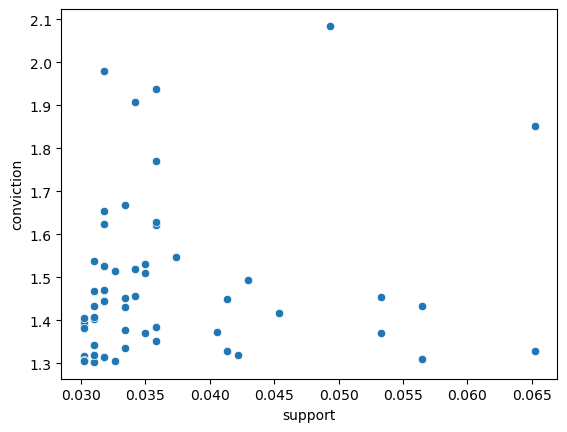

In [26]:
sns.scatterplot(x='support',y='conviction',data=fpgr_rules_conv)

<Axes: xlabel='conviction'>

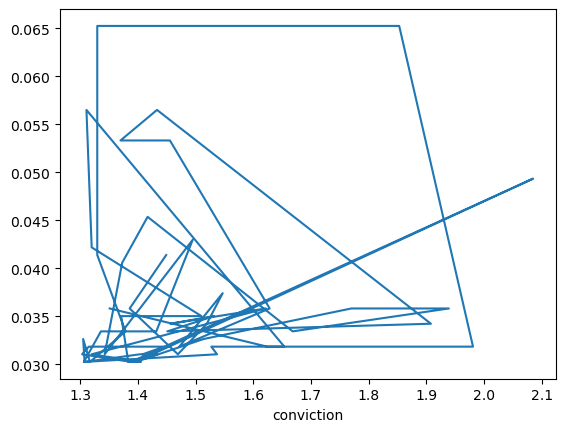

In [27]:
fpgr_rules_conv.set_index('conviction')['support'].plot()

### Диаграммы boxplot для оценки качества в зависимости от длины правила

/Users/tainazitina/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<Axes: title={'center': 'conviction'}, xlabel='length'>

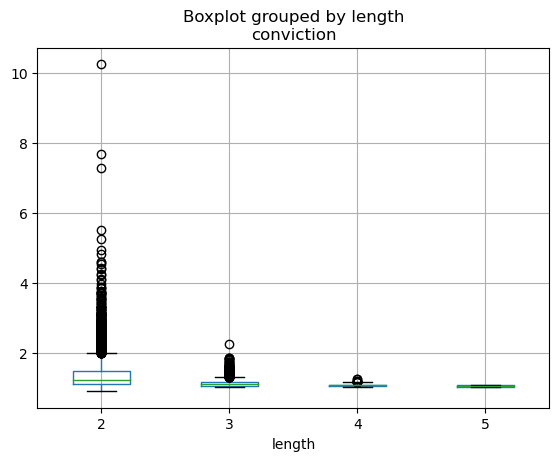

In [28]:
temp_test_data = ml.fpgrowth(binary_usa, min_support=0.009, use_colnames=True)
temp_test_data_2 = ml.association_rules(temp_test_data, metric='conviction', min_threshold=0.09)
temp_test_data_2['length'] = temp_test_data_2['consequents'].apply(lambda x: len(x)+1)

temp_test_data_2.boxplot(column=['conviction'], by='length')